In [98]:
# 과적합 피하기

In [2]:
import pandas as pd

df = pd.read_csv('./data/sonar3.csv', header=None)   #header=None을 안하면 첫번째 열이 header가 됨. 방지 목적
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [6]:
df.shape

(208, 61)

In [100]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [8]:
## 2진 분류 문제
## X, y data 슬라이싱
## 모델 만들어서... 학습 (모델 레이어수, 노드 수, epochs등 임의로 설계)
## 학습 결과 시각화

In [10]:
df.iloc[:,-1].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [12]:
X = df.iloc[:, :-1]
X.shape

(208, 60)

In [14]:
y = df.iloc[:, -1]
y.shape        # y.shape : (1, 208) 또는 (208, ) 모두 가능

(208,)

In [16]:
X.values , y.values

(array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
        [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
        [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
        ...,
        [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
        [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
        [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #y.shape : (1,208) 또는 (208, ) 모두 가능

model.summary()

C:\Users\5012j\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │           1,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,725 (6.74 KB)

 Trainable params: 1,725 (6.74 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5087 - loss: 0.7248
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5798 - loss: 0.6835
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6034 - loss: 0.6677
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5762 - loss: 0.6673
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6438 - loss: 0.6499
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.6390
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6835 - loss: 0.6219
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.6074
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7602 - loss: 0.5740
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5642  
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.5410
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

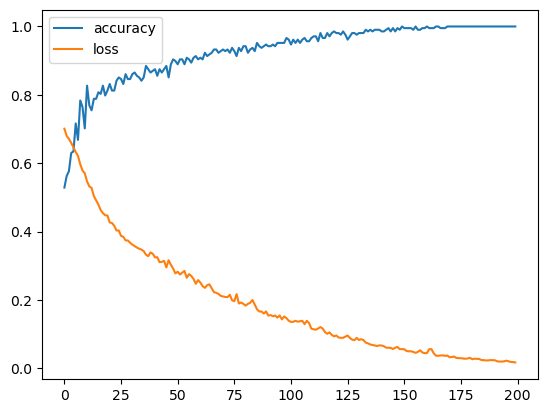

In [22]:
## 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │           1,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,177 (20.23 KB)

 Trainable params: 1,725 (6.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,452 (13.49 KB)

# 과제 1 : 과적합 피하는 법 - 모델 평가 (Training Set와 Test Set 분리)

In [26]:
# 학습 셋과 테스트 셋을 구분합니다. Seperate the training set and test set.
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145, 60), (63, 60), (145,), (63,))

In [28]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (63, 60)
y_test shape: (63,)


In [30]:
208*0.7  # training data 갯수

145.6

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history1 = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200


C:\Users\5012j\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4366 - loss: 0.6994
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5116 - loss: 0.6895
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5089 - loss: 0.6926  
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5291 - loss: 0.6871 
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.6747  
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5446 - loss: 0.6774 
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6194 - loss: 0.6589 
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 0.6625 
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.6535 
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - loss: 0.6400 
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6369 
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

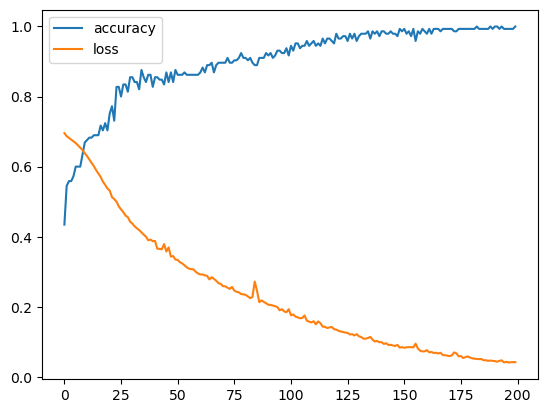

In [34]:
## 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['loss'], label='loss')
plt.legend()
plt.show()

<Axes: >

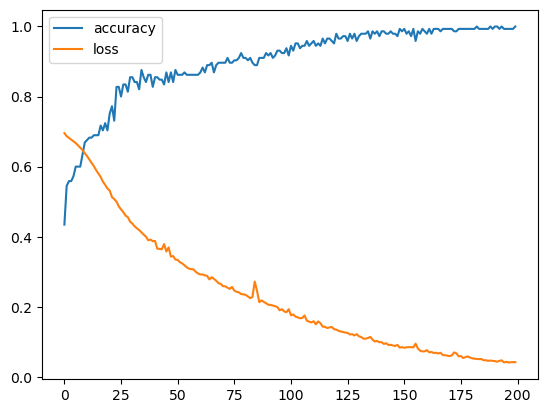

In [36]:
## 판다스 데이터 프레임으로 시각화
import pandas as pd
df_history1 = pd.DataFrame(history1.history)   # history1.history : 딕셔너리
df_history1.plot()

In [38]:
df_history1   # 학습 200회 해서 row가 200

,accuracy,loss
0,0.434483,0.695542
1,0.544828,0.687026
2,0.558621,0.682036
3,0.558621,0.677086
4,0.572414,0.671996
...,...,...
195,0.993103,0.042972
196,0.993103,0.041002
197,0.993103,0.041603
198,0.993103,0.042102


## Train_test_split으로 분리해 놓은 Test Set으로 모델을 검증하기

In [40]:
## 테스트 데이터로 정확도 검증하기
test_score = model.evaluate(X_test, y_test)

print(test_score)  #[Loss, accuracy]
print("테스트 셋에 대한 정확도 : ", test_score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8315 - loss: 0.6792  
[0.6953437328338623, 0.8253968358039856]
테스트 셋에 대한 정확도 :  0.8253968358039856


In [42]:
## 학습 데이터로 정확도 측정하기
train_score = model.evaluate(X_train, y_train)

print(test_score)  #[Loss, accuracy]
print("학습 셋에 대한 정확도 : ", train_score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9869 - loss: 0.0444 
[0.6953437328338623, 0.8253968358039856]
학습 셋에 대한 정확도 :  0.9931034445762634


In [44]:
## 결론 :  과적합이 일어났을 가능성이 매우 높음!

## 학습할 때 Validation 데이터로 검증하며 학습하기

In [46]:
###### 윗부분 데이터 읽고, 전처리 부분 입력! ######

## 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history2 = model.fit(X_train, y_train, epochs=200, batch_size=10,
                    validation_data = (X_test, y_test))

Epoch 1/200


C:\Users\5012j\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5161 - loss: 0.7066 - val_accuracy: 0.5714 - val_loss: 0.6832
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5749 - loss: 0.6752 - val_accuracy: 0.5556 - val_loss: 0.6760
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5759 - loss: 0.6723 - val_accuracy: 0.5397 - val_loss: 0.6708
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6373 - loss: 0.6679 - val_accuracy: 0.6190 - val_loss: 0.6646
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6755 - loss: 0.6507 - val_accuracy: 0.6349 - val_loss: 0.6578
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6536 - loss: 0.6357 - val_accuracy: 0.6032 - val_loss: 0.6511
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7169 - loss: 0.6295 - val_accuracy: 0.6508 - val_loss: 0.6445
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6379 - val_accuracy: 0.6508 - val_loss: 0.

In [48]:
history2.history.keys()   # 딕셔너리의 키

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [50]:
len(history2.history['val_accuracy'])

200

In [52]:
df_history2 = pd.DataFrame(history2.history)
df_history2

,accuracy,loss,val_accuracy,val_loss
0,0.524138,0.694247,0.571429,0.683223
1,0.537931,0.677310,0.555556,0.676037
2,0.558621,0.668437,0.539683,0.670780
3,0.682759,0.657320,0.619048,0.664632
4,0.675862,0.645698,0.634921,0.657771
...,...,...,...,...
195,1.000000,0.032396,0.825397,0.675462
196,1.000000,0.031694,0.825397,0.691775
197,1.000000,0.032401,0.825397,0.638332
198,1.000000,0.033142,0.825397,0.715101


<Axes: >

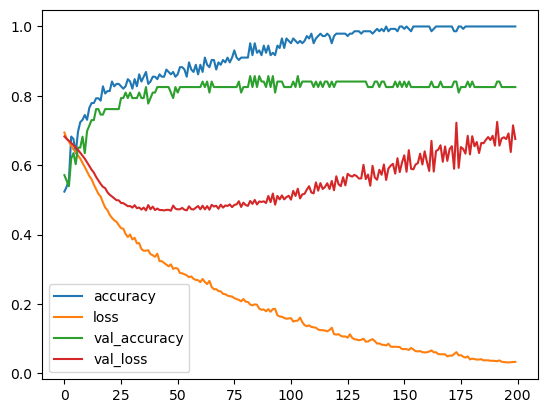

In [54]:
df_history2.plot()

<Axes: >

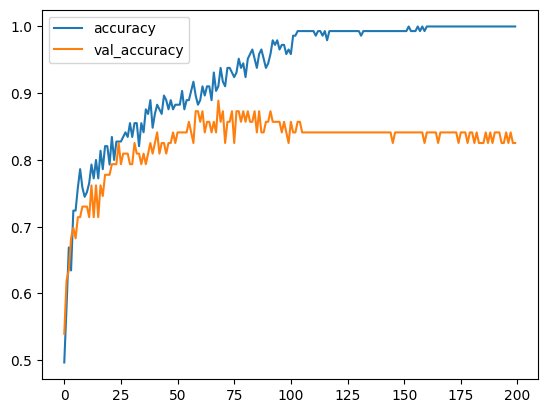

In [126]:
df_history2[['accuracy','val_accuracy']].plot()

<Axes: >

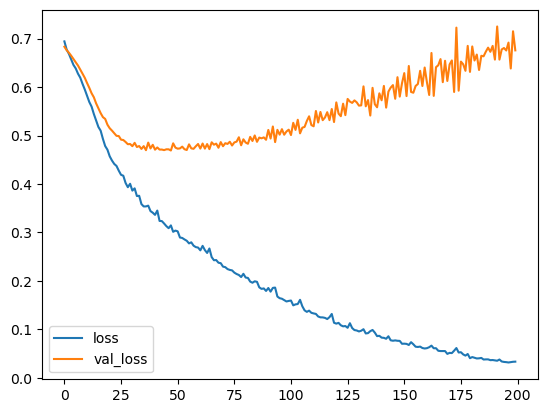

In [56]:
df_history2[['loss','val_loss']].plot()

## 과제 2 - 실습해보기

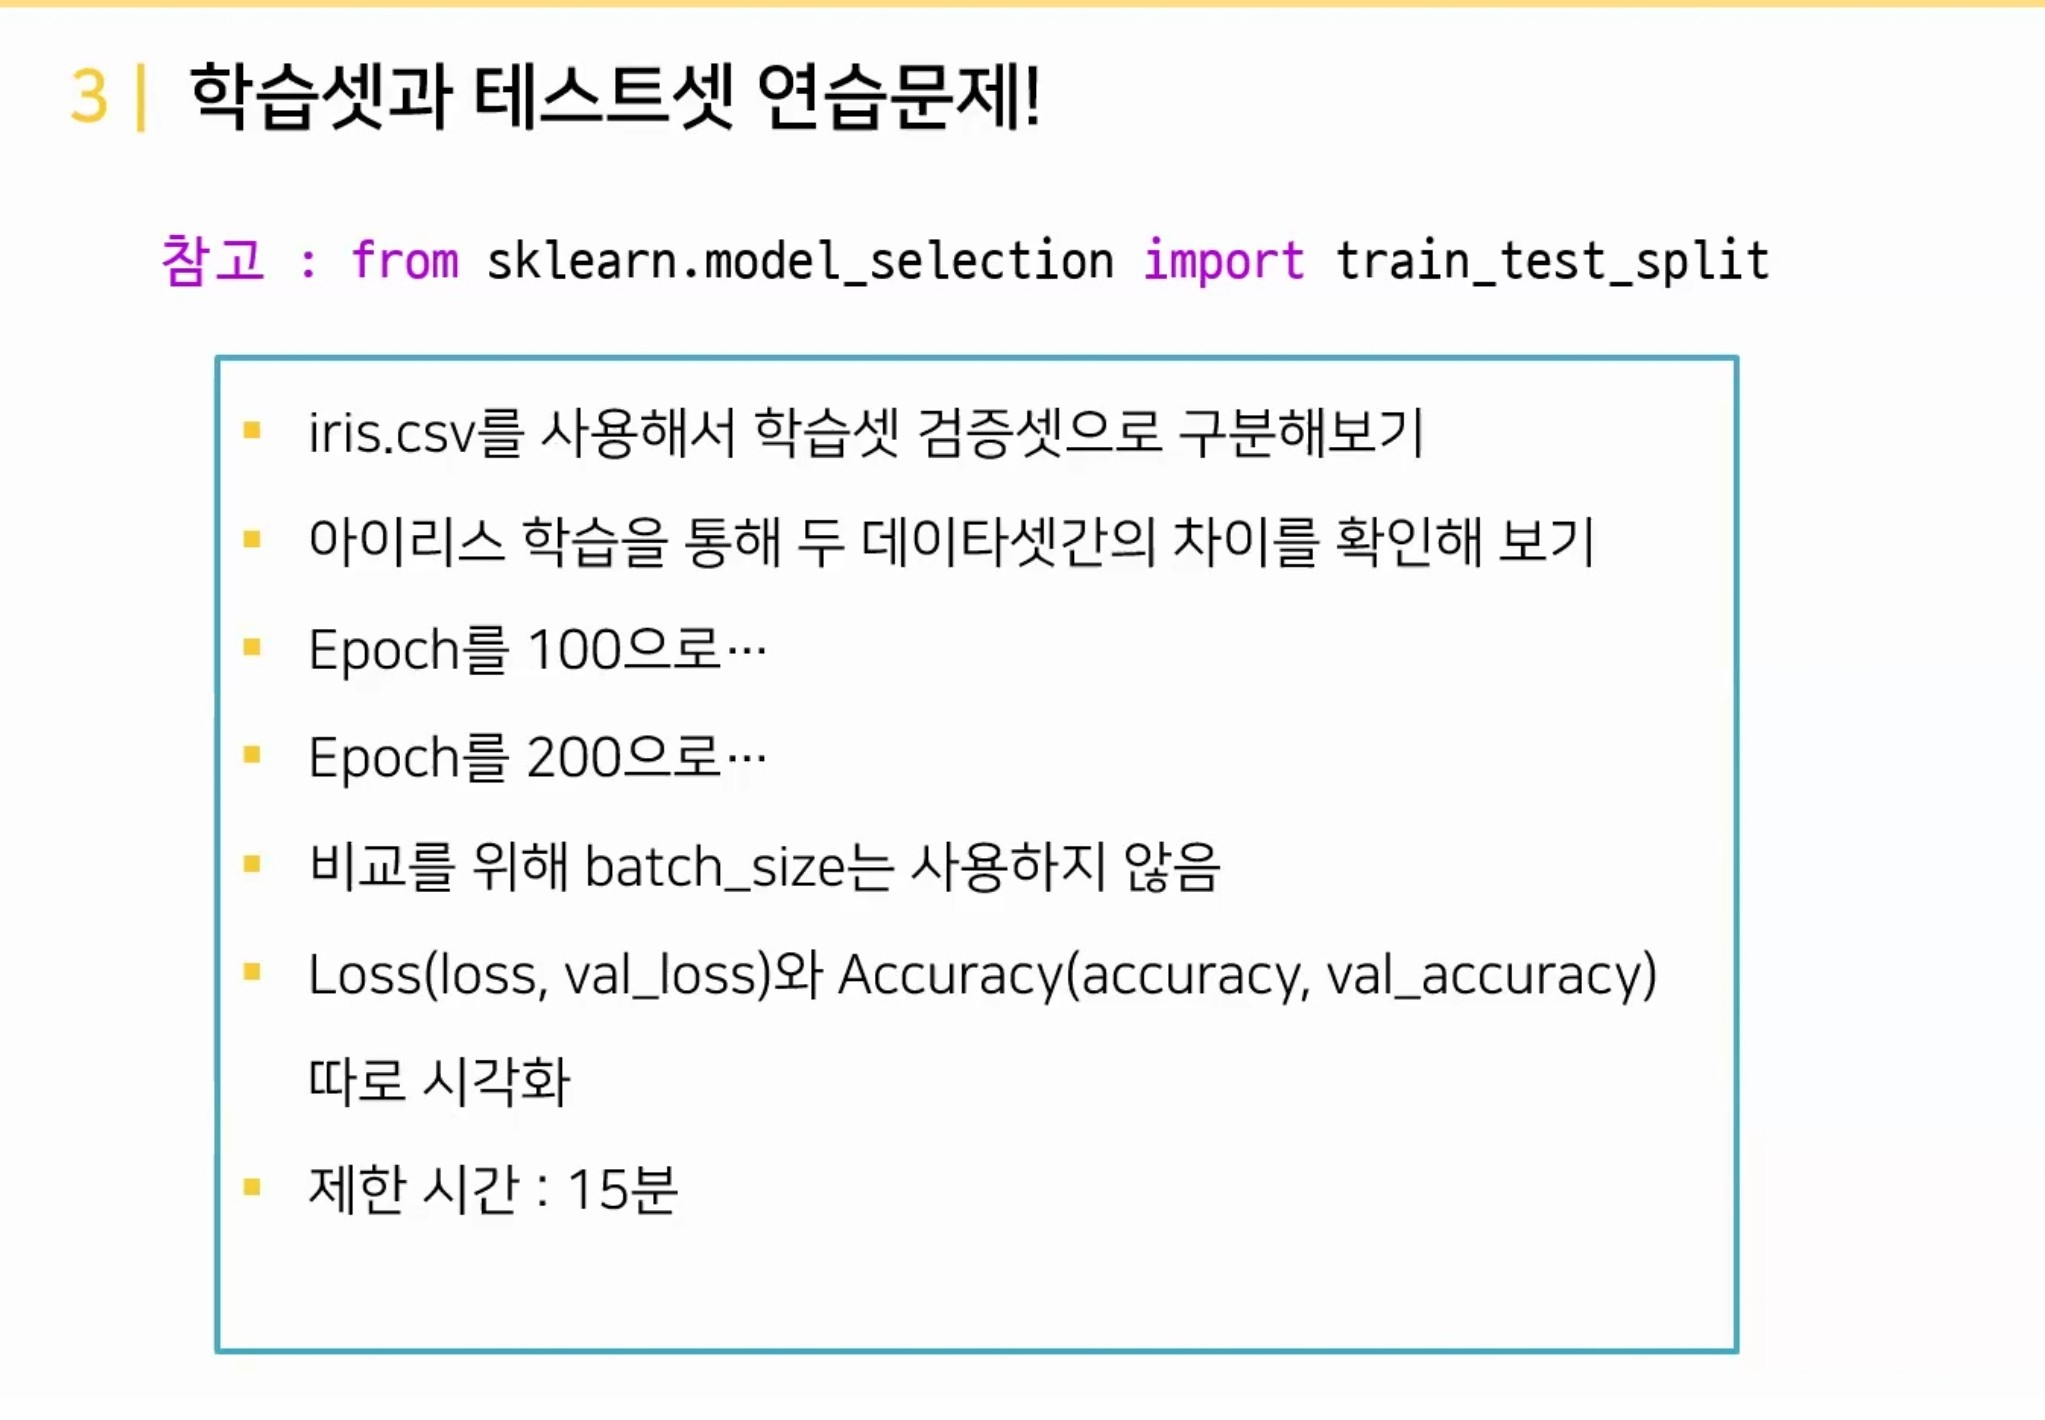

In [128]:
Image('./사진/Screenshot_20240819_151915_Chrome.jpg')

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np

# 데이터 입력
df = pd.read_csv('./data/iris3.csv')

dataset = df.values
X = dataset[:, :-1].astype(float)  # 입력 데이터
Y = dataset[:, -1]  # 레이블 데이터

# 라벨 인코딩 및 원-핫 인코딩
e = LabelEncoder()
e.fit(Y)
Y_e = e.transform(Y)
Y_onehot = tf.keras.utils.to_categorical(Y_e)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.3, random_state=42)

# 모델 구성
model = Sequential()  # 모델 초기화
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
hist = model.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test))

# 학습셋 Accuracy 계산
print("\nTrain Accuracy: %.4f" % (model.evaluate(X_train, Y_train)[1]))

# 테스트셋 Accuracy 계산
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/500


C:\Users\5012j\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.3649 - loss: 1.8238 - val_accuracy: 0.2889 - val_loss: 2.0517
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3149 - loss: 1.8559 - val_accuracy: 0.2889 - val_loss: 1.9468
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3826 - loss: 1.5929 - val_accuracy: 0.2889 - val_loss: 1.8563
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3368 - loss: 1.6215 - val_accuracy: 0.2889 - val_loss: 1.7729
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3607 - loss: 1.5083 - val_accuracy: 0.2889 - val_loss: 1.6985
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3420 - loss: 1.4809 - val_accuracy: 0.2889 - val_loss: 1.6320
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3243 - loss: 1.4597 - val_accuracy: 0.2889 - val_loss: 1.5732
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3535 - loss: 1.3661 - val_accuracy: 0.2889 - val_loss: 1.5221
Epo

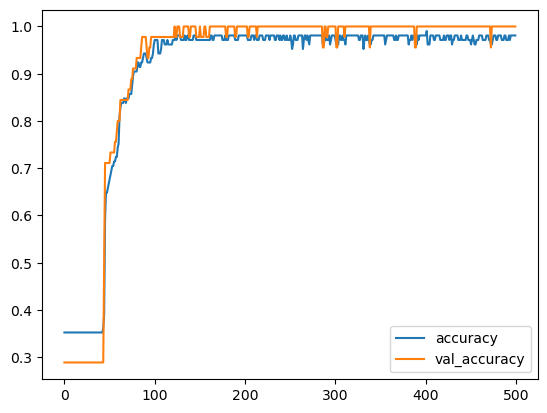

In [62]:
## hist.history를 pandas data frame으로 만들어서 시각화
df_history = pd.DataFrame(hist.history)
df_history[['accuracy', 'val_accuracy']].plot()   # array로 인덱싱한것 그래서 [[]] 2개
plt.show()

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

In [66]:
X_test[:5]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4]])

In [68]:
## 새로운 X데이터로 y값 추정하기
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[8.1535307e-04, 9.7568953e-01, 2.3495052e-02],
       [9.9944717e-01, 5.5278279e-04, 3.5107781e-13],
       [2.0291420e-09, 8.1206425e-05, 9.9991882e-01],
       [5.8292411e-04, 9.5919687e-01, 4.0220205e-02],
       [3.7213883e-04, 9.8695648e-01, 1.2671429e-02]], dtype=float32)

In [70]:
## 위의 결과가 one-hot Encoding이 아님.
model.predict(X_test[:5]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([1, 0, 2, 1, 1], dtype=int64)

In [72]:
e    # Label Encoder 객체

LabelEncoder()

In [74]:
e.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
Y_predicted_index = model.predict(X_test[:5]).argmax(axis=1)
e.classes_[model.predict(X_test[:5]).argmax(axis=1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [78]:
Y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [80]:
# predict값이 실제값과 동일한지 확인
Y_test[:5].argmax(axis=1)

array([1, 0, 2, 1, 1], dtype=int64)

## Practice #1

In [130]:
import numpy as np

A = np.arange(6).reshape(2,3)
A

array([[0, 1, 2],
       [3, 4, 5]])

In [131]:
A.sum()

15

In [134]:
A.sum(axis=0)  # 각 column 전부 더하기

array([3, 5, 7])

In [135]:
A.sum(axis=1)  # 각 row 전부 더하기

array([ 3, 12])

In [136]:
A.argmax()   # 최대값의 인덱스

5

In [137]:
A.argmax(axis=0)  # 각 Column중에 큰 값의 인덱스

array([1, 1, 1], dtype=int64)

In [138]:
A.argmax(axis=1)  # 각 row 중에 큰 값의 인덱스  

array([2, 2], dtype=int64)

## 모델 저장하기

In [82]:
model.save('./data/sonar3_model.keras')   # 폴더가 다 있어야 저장 가능. 써놓은 폴더 없음 저장 불가능.

In [84]:
del model

In [86]:
# model.summary()    # model이 지워져서 error!

## 모델 불러오기 / 재사용

In [88]:
from tensorflow.keras.models import Sequential, load_model
sonar3_model = load_model('./data/sonar3_model.keras')
sonar3_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

In [90]:
Y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [92]:
## 모델 평가
sonar3_model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0513  


[0.04575785622000694, 1.0]

In [94]:
## 모델로 예측

sonar3_model.predict(X_test).argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)